In [1]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import SGD


Using TensorFlow backend.


In [0]:
# DATA PREPROCESSING AND CLEANING 
training_set = pd.read_csv('TATASTEEL.csv')
training_set = training_set.iloc[:,1:2].values      #open prices
len(training_set)       #2D array 
training_set = training_set[~np.isnan(training_set)]
len(training_set)       #1D array
new_training_set = [[i] for i in training_set]      #converting back to 2D array
new_training_set = np.array(new_training_set) 
# new_training_set


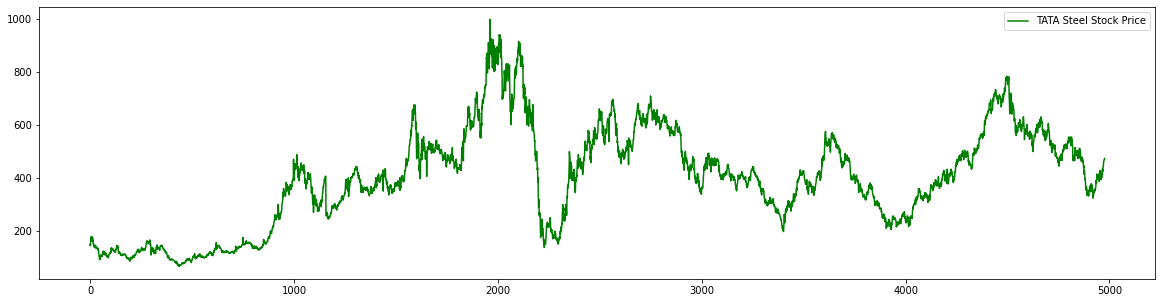

In [4]:
plt.figure(figsize=(20,5))
plt.plot(new_training_set,color="green",label="TATA Steel Stock Price")
plt.legend()
plt.show()

In [0]:
# FEATURE SCALING 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_training_set = sc.fit_transform(new_training_set)

In [0]:
# CREATING INPUT DATA STREAM
x_train = new_training_set[:]
x_new_train=[]
y_train=[]
for i in range(0,3000):
    x_new_train.append([x_train[i:i+50]])
    y_train.append(x_train[i+50])


x_train = np.reshape(x_new_train,(3000,50,1))
y_train = np.array(y_train)

In [0]:
# BUILDING THE MODEL
model = Sequential()

model.add(LSTM(1000,input_shape=(50,1),return_sequences=True))
model.add(LSTM(500))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dense(1))

In [0]:
# COMPILING MODEL 
model.compile(optimizer="adam",loss="mean_squared_error")

In [9]:
# STRUCTURE OF THE MODEL
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 1000)          4008000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 500)               3002000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               64128     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 7,074,257
Trainable params: 7,074,257
Non-trainable params: 0
_________________________________________________________________


In [10]:
# TRAINING THE MODEL ON THE TRAINING SET
model.fit(x_train,y_train,batch_size=256,epochs=200)

Epoch 1/200
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0442
Epoch 2/200
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0043
Epoch 3/200
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0015
Epoch 4/200
3000/3000 [==============================] - 6s 2ms/step - loss: 9.3311e-04
Epoch 5/200
3000/3000 [==============================] - 6s 2ms/step - loss: 8.6805e-04
Epoch 6/200
3000/3000 [==============================] - 6s 2ms/step - loss: 7.7788e-04
Epoch 7/200
3000/3000 [==============================] - 6s 2ms/step - loss: 7.2955e-04
Epoch 8/200
3000/3000 [==============================] - 6s 2ms/step - loss: 6.7006e-04
Epoch 9/200
3000/3000 [==============================] - 6s 2ms/step - loss: 7.1790e-04
Epoch 10/200
3000/3000 [==============================] - 6s 2ms/step - loss: 7.0881e-04
Epoch 11/200
3000/3000 [==============================] - 6s 2ms/step - loss: 6.4084e-04
Epoch 12/200
3000/3000 [==================

In [0]:
# SAVING THE MODEL
model.save("model.h5")

# ***PREDICTION***

In [0]:
# IMPORTING LIBRARIES
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
# LOADING SAVED MODEL
model = load_model("model.h5")

In [14]:
# DATA PREPROCESSING AND CLEANING
test_set = pd.read_csv('TATASTEEL.csv')
test_set = test_set.iloc[:,1:2].values #open prices
len(test_set)
test_set #2D array 
test_set = test_set[~np.isnan(test_set)]
test_set #1D array
len(test_set)
new_test_set = [[i] for i in test_set] #converting back to 2D array
new_test_set = np.array(new_test_set) 
new_test_set

array([[148.  ],
       [150.1 ],
       [144.6 ],
       ...,
       [469.25],
       [470.1 ],
       [472.65]])

In [15]:
# RETRIEVING REAL VALUES FROM TABLE 
real = []
for i in range(0,4900):
    real.append(new_test_set[i+50])
    

real = np.array(real)
len(real)

4900

In [0]:
# NORMALIZATION
sc = MinMaxScaler()
new_test_set = sc.fit_transform(new_test_set)

In [0]:
# CREATING INPUT STREAM OF DATA 
x_train = new_test_set[:]
x_test=[]
y_test=[]
for i in range(3000,4900):
    x_test.append([x_train[i:i+50]])
    y_test.append(x_train[i+50])

x_test=np.reshape(x_test,(1900,50,1))
y_test=np.array(y_test)

In [0]:
# PREDICTION 
pred = model.predict(x_test)

In [0]:
# GETTING INVERSE TRANSFORMED VALUES OF PREDICTIONS 
pred = sc.inverse_transform(pred)
y_test_ = sc.inverse_transform(y_test)

In [0]:
pred
for i in range(3000):
    pred = np.insert(pred,0,[math.nan])

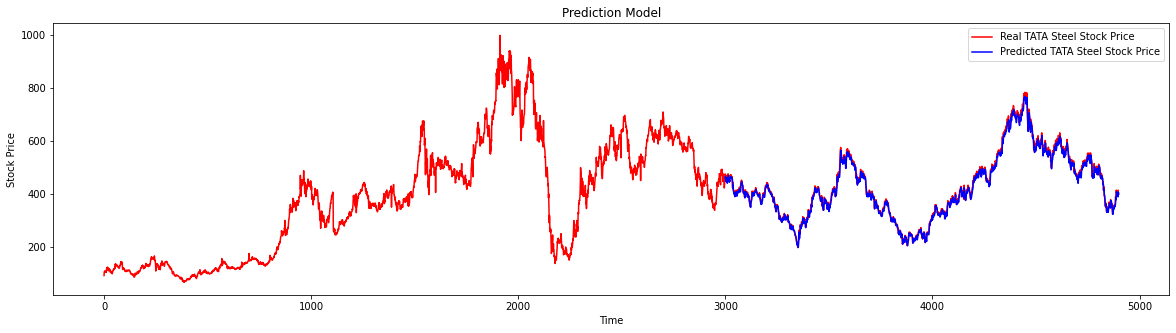

In [21]:
# VISUALIZATION OF PREDICTIONS VS REAL DATA
plt.figure(figsize=(20,5))
plt.plot(real,color="red",label="Real TATA Steel Stock Price")
plt.plot(pred,color="blue",label="Predicted TATA Steel Stock Price")
plt.title("Prediction Model")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()    
plt.show()

# ***RETRIEVING PREDICTION AND REAL VALUES***

In [22]:
pred = pred[~np.isnan(pred)]
new_pred = [[i] for i in pred]      #converting back to 2D array
new_pred = np.array(new_pred) 
new_pred

array([[464.53125],
       [456.52515],
       [454.78845],
       ...,
       [390.77722],
       [405.5673 ],
       [399.98914]], dtype=float32)

In [0]:
real = real[3000:4900]

In [24]:
# CALCULATION OF RMSE VALUE
rmse = math.sqrt(mean_squared_error(real,new_pred))
print("rmse is:", '{0:.2f}'.format((rmse/1900)*100),"%")

rmse is: 0.60 %
